MNIST 데이터로 숫자인식하기

In [11]:
# coding: utf-8
import sys
sys.path.insert(0, r'C:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic')
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax
import matplotlib.pyplot as plt

이미 학습된 모델(sample_weight.pkl)을 가지고 예측해볼 것임

In [6]:
# 테스트(예측)해보기 위한 테스트 데이터 가져오는 함수 정의
def get_data():
    (X_train, t_train), (X_test, t_test) = load_mnist(normalize=True,
                                                      flatten= True,
                                                       one_hot_label=False)
    return X_test, t_test

# 학습된 신경망(모델) 가중치값 파일 로딩 
def init_network():
    with open("./sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [7]:
# 예측하는 함수 정의
def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 1번째 레이어
    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    # 2번째 레이어
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    # 3번째 레이어
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

In [9]:
# 테스트 데이터 가져오기
X, t = get_data()

# 학습된 신경망 가져오기
network = init_network()

# 정확도 측정을 위해 맞춘 개수 변수
accuracy_cnt = 0

for i in range(len(X)):
    y = predict(network, X[i])  # 테스트 데이터의 i번째 이미지의 신경망 출력 계산
    p = np.argmax(y)    #출력값 중 확률이 가장 높은 노드의 '인덱스' 반환 
    if p == t[i]:   # 계산해서 확률이 가장 높았던 노드의 인덱스와 정답(레이블) 비교 
        print('Predicted number = ', p, 'Original number = ', t[i])
        # time.sleep(0.5)
        accuracy_cnt += 1  # 맞았으면 정답 카운트 +1

print('Accuracy: ' + str(float(accuracy_cnt) / len(X)))


C:\Users\USER\AppData\Local\Temp\ipykernel_26348\3082864004.py:11: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  network = pickle.load(f)


Predicted number =  7 Original number =  7
Predicted number =  2 Original number =  2
Predicted number =  1 Original number =  1
Predicted number =  0 Original number =  0
Predicted number =  4 Original number =  4
Predicted number =  1 Original number =  1
Predicted number =  4 Original number =  4
Predicted number =  9 Original number =  9
Predicted number =  9 Original number =  9
Predicted number =  0 Original number =  0
Predicted number =  6 Original number =  6
Predicted number =  9 Original number =  9
Predicted number =  0 Original number =  0
Predicted number =  1 Original number =  1
Predicted number =  5 Original number =  5
Predicted number =  9 Original number =  9
Predicted number =  7 Original number =  7
Predicted number =  3 Original number =  3
Predicted number =  4 Original number =  4
Predicted number =  9 Original number =  9
Predicted number =  6 Original number =  6
Predicted number =  6 Original number =  6
Predicted number =  5 Original number =  5
Predicted n

Predicted number =  6 Original number =  5
9 번째 이미지


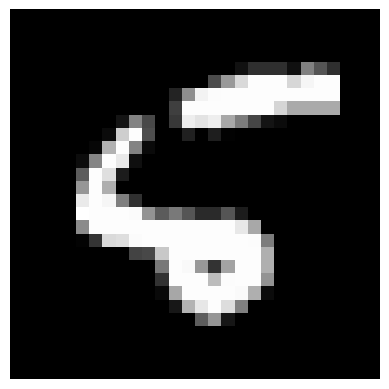

Predicted number =  6 Original number =  4
34 번째 이미지


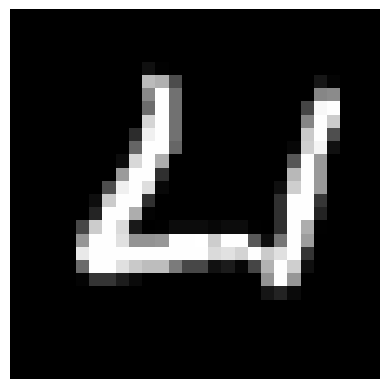

Predicted number =  2 Original number =  6
67 번째 이미지


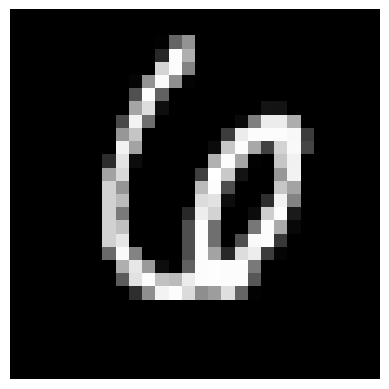

Predicted number =  4 Original number =  9
93 번째 이미지


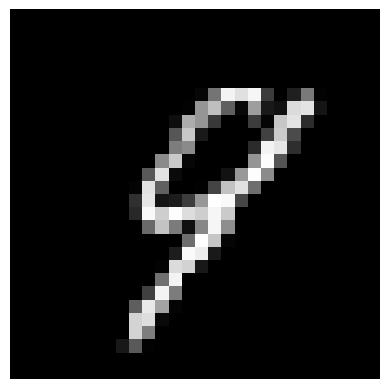

Predicted number =  4 Original number =  7
125 번째 이미지


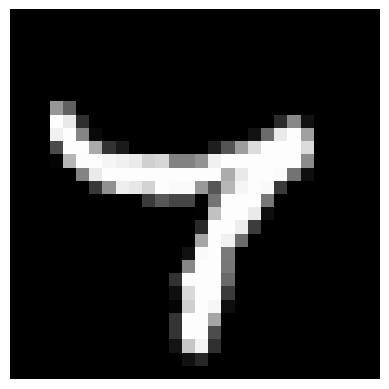

Predicted number =  9 Original number =  2
150 번째 이미지


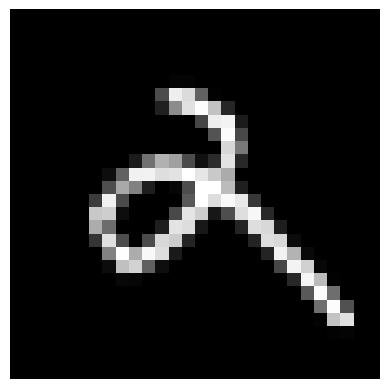

Predicted number =  5 Original number =  6
218 번째 이미지


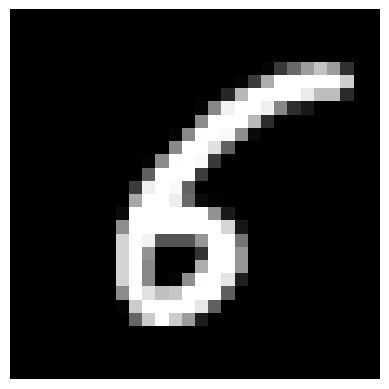

Error rate: 0.031818181818181815


In [21]:
# 번외 - 몇 번이 다른지를 찍어보기

# 틀린 개수 
wrong_cnt = 0

# 이미지 출력해보기
def img_show(img):
    img = img.reshape(28, 28)   # 이미지 출력을 위해 1차원 -> 2차원 이미지로 변경
    plt.imshow(img, cmap='gray')
    plt.axis('off') # 축 숨기기
    plt.show()

len = 220 # 너무 많아서 일단 개수 지정

for i in range(len):
    y = predict(network, X[i])  # 테스트 데이터의 i번째 이미지의 신경망 출력 계산
    p = np.argmax(y)    #출력값 중 확률이 가장 높은 노드의 '인덱스' 반환 
    if p != t[i]:   # 계산해서 확률이 가장 높았던 노드의 인덱스와 정답(레이블) 비교 
        print('Predicted number = ', p, 'Original number = ', t[i])
        # time.sleep(0.5)
        wrong_cnt += 1  # 맞았으면 정답 카운트 +1
        print(f'{i+1} 번째 이미지')
        img_show(X[i])

print('Error rate: ' + str(float(wrong_cnt) / len))